In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
df= pd.read_csv("data.csv")
df.head()

,Temperature,Clearsky DHI,Clearsky DNI,Relative Humidity,Wind Speed,DNI,Cloud Type,Clearsky GHI,DHI,GHI,Solar Zenith Angle
0,5.0,0,0,63.52,1.4,0,0,0,0,0,174.62
1,4.7,0,0,65.31,1.4,0,0,0,0,0,161.76
2,6.2,0,0,75.81,1.3,0,0,0,0,0,148.34
3,5.6,0,0,79.06,1.3,0,0,0,0,0,134.93
4,5.0,0,0,82.37,1.4,0,0,0,0,0,121.67


In [4]:
df.shape

(8760, 11)

In [5]:
df.isnull().sum()

Temperature           0
Clearsky DHI          0
Clearsky DNI          0
Relative Humidity     0
Wind Speed            0
DNI                   0
Cloud Type            0
Clearsky GHI          0
DHI                   0
GHI                   0
Solar Zenith Angle    0
dtype: int64

In [6]:
features=list(df)
features

['Temperature',
 'Clearsky DHI',
 'Clearsky DNI',
 'Relative Humidity',
 'Wind Speed',
 'DNI',
 'Cloud Type',
 'Clearsky GHI',
 'DHI',
 'GHI',
 'Solar Zenith Angle']

In [7]:
col_name = "GHI"

In [8]:
index_no = df.columns.get_loc(col_name)
index_no

9

In [9]:
column_name= "Clearsky DHI"

In [10]:
index_no1 = df.columns.get_loc(column_name)
index_no1

1

In [12]:
df.drop(df.columns[[0,2,3,4,5,6,7,8,10]], axis=1, inplace=True)

In [13]:
k= KMeans(n_clusters=2)
cluster= k.fit_predict(df)
cluster

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
df['cluster']=cluster.tolist()
df.head()

,Clearsky DHI,GHI,cluster
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [15]:
df.cluster.unique()

array([0, 1], dtype=int64)

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
#df3 = df[df.cluster==2]
#df4= df[df.cluster==3]

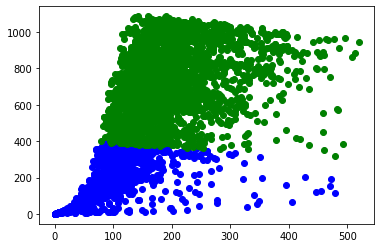

In [17]:
plt.scatter(df1['Clearsky DHI'],df1['GHI'],color='blue')
plt.scatter(df2['Clearsky DHI'],df2['GHI'],color='green')
#plt.scatter(df3['Clearsky GHI'],df3['GHI'],color='yellow')
#plt.scatter(df4['ghi_pyr'],df4['dni'],color='red')

In [18]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    k = KMeans(n_clusters=k)
    k.fit(df)
    sse.append(k.inertia_)

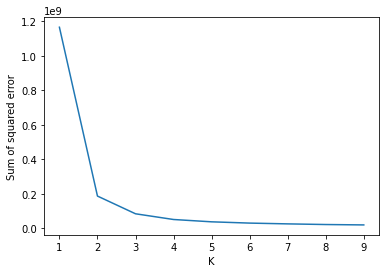

In [19]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
import pandas as pd
df= pd.read_csv("clustering.csv")

In [20]:
Clearsky_DHI=df["Clearsky DHI"]
GHI=df["GHI"]

In [21]:
import plotly.express as px

fig = px.scatter(x=Clearsky_DHI,y=GHI, color=df['cluster'])

fig.show()

In [22]:
df.to_csv(r'E:\CatBoost_1\Johannesburg\K_mean_clustering\clustering.csv', index = False)